Aviation Data

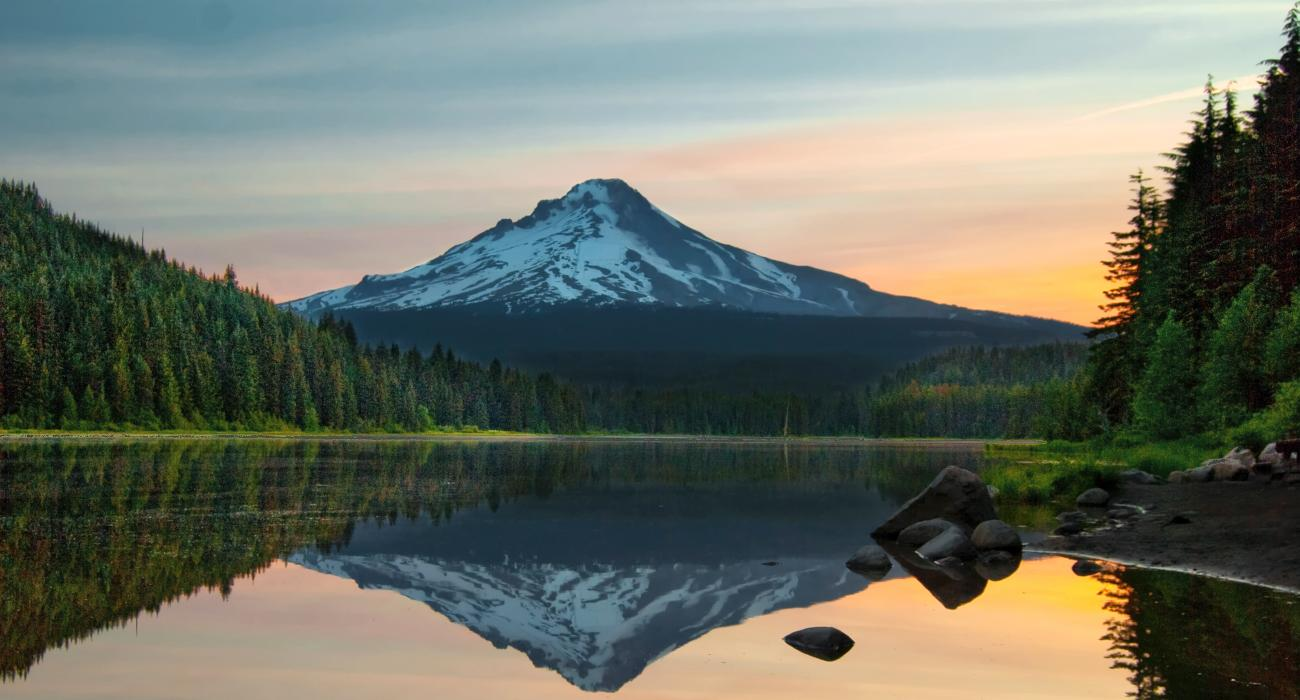

In [1]:
# Objective 1: Look for aircraft that is lowest risk in terms of investment
# Objective 2: Give 3 business recommendation
# Objective 3: Visualizations

In [2]:
# Import libraries
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/Aviation_Data.csv')

/Users/jacobserfaty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


GOT RID OF IRRELEVANT COLUMNS

In [4]:
df.shape

(90348, 31)

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
new_cols = ['Country', 'Injury.Severity', 'Aircraft.damage', 
            'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines',
            'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
            'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 
            'Report.Status']

In [7]:
df = df[new_cols]

In [8]:
df.columns

Index(['Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

CLEANING EACH INDIVIDUAL COLUMN

In [9]:
df['Country'] = df['Country'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)
df['Country'] = df['Country'].str.replace("United states", "United States")
df['Country'] = df['Country'].str.replace("United kingdom", "United Kingdom")
df['Country'] = df['Country'].str.replace("South africa", "South Africa")

In [10]:
df.loc[~df['Country'].isin(['United States', 'Canada', 'Mexico', 'Brazil', 
'United Kingdom', 'Australia', 'France', 'Spain', 'Bahamas', 'Germany', 'Columbia', 
'South Africa', 'Japan', 'Venezuela', 'Italy', 'Argentina', 'Indonesia', 'India', 'Peru', 'Russia']), 
'Country'] = 'Other'

In [11]:
df['Country'].unique()

array(['United States', 'Other', 'Bahamas', 'Germany', 'Canada', 'Mexico',
       'Australia', 'Japan', 'Venezuela', 'United Kingdom', 'France',
       'Brazil', 'Argentina', 'Italy', 'Spain', 'Peru', 'South Africa',
       'India', 'Indonesia', 'Russia'], dtype=object)

In [12]:
df['Make'] = df['Make'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)

In [13]:
df['Make'].value_counts()

Cessna        27149
Piper         14870
Beech          5372
Boeing         2745
Bell           2722
              ...  
Lerch             1
Freije            1
Greg smith        1
Lee paul          1
Ramseyer          1
Name: Make, Length: 7587, dtype: int64

In [14]:
df.loc[~df['Injury.Severity'].isin(['Non-Fatal', 'nan', 'Minor', 'Serious', 'Incident', 'Unavailable']), 
'Injury.Severity'] = 'Fatal'

In [15]:
df['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', 'Minor',
       'Serious'], dtype=object)

In [16]:
df['Number.of.Engines'] = df['Number.of.Engines'].apply(lambda x: float(x))

In [17]:
df['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [18]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [19]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Executive/corporate", "Business")
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Public Aircraft - State", "Public Aircraft" )
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Public Aircraft - Federal", "Public Aircraft" )
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Public Aircraft - Local", "Public Aircraft" )
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Air Race/show", "Air Race show" )

In [20]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Air Race show", "Air Race Show" )

In [21]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Aerial Observation', 'Aerial Application', 'Public Aircraft',
       'Skydiving', 'Other Work Use', 'Positioning', 'Flight Test',
       'Air Race Show', 'Air Drop', 'Glider Tow', 'External Load',
       'Banner Tow', 'Firefighting', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [22]:
df['Weather.Condition'] = df['Weather.Condition'].str.replace("Unk", "UNK")

In [23]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [24]:
df.loc[~df['Report.Status'].isin(['Probable Cause', 'Foreign']), 
'Report.Status'] = 'Other'

In [25]:
df['Report.Status'].unique()

array(['Probable Cause', 'Other', 'Foreign'], dtype=object)

In [26]:
df.isna().sum()

Country                       0
Injury.Severity               0
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status                 0
dtype: int64

CLEANING THE COLUMN NAMES

In [27]:
new_column_names = {
    'Injury.Severity': 'Injury Severity',
    'Aircraft.damage': 'Aircraft Damage',
    'Aircraft.Category': 'Aircraft Category',
    'Amateur.Built': 'Amateur Built',
    'Number.of.Engines': 'Engines Count',
    'Purpose.of.flight': 'Purpose of Flight',
    'Total.Fatal.Injuries': 'Total Fatal Injuries',
    'Total.Serious.Injuries': 'Total Serious Injuries',
    'Total.Minor.Injuries': 'Total Minor Injuries',
    'Total.Uninjured': 'Total Uninjured',
    'Weather.Condition': 'Weather Condition',
    'Broad.phase.of.flight': 'Broad Flight Phase',
    'Report.Status': 'Report Status',
    'Engine.Type': 'Engine Type'
}

In [28]:
df.rename(columns=new_column_names, inplace=True)

In [29]:
df.head(60)

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status
0,United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,United States,Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
5,United States,Non-Fatal,Substantial,Airplane,Mcdonnell douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause
6,United States,Fatal,Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
8,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause
9,United States,Non-Fatal,Substantial,NaN,North american,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause


GETTING RID OF NANS

In [38]:
df[df['Engines Count'].isna()]

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status
4,United States,Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
3600,United States,Non-Fatal,NaN,NaN,Piccard,AX-6,No,NaN,Unknown,Personal,0.0,1.0,0.0,1.0,VMC,Landing,Probable Cause
3741,United States,Non-Fatal,Substantial,NaN,Schweizer,2-33A,No,NaN,Unknown,Instructional,0.0,1.0,0.0,0.0,VMC,Takeoff,Probable Cause
3772,United States,Fatal,Destroyed,NaN,Schweizer,SGS 1-26B,No,NaN,Unknown,Instructional,1.0,0.0,0.0,0.0,VMC,Approach,Probable Cause
3870,United States,Non-Fatal,Substantial,NaN,Pratt-read,PRG-1,No,NaN,Unknown,Instructional,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,Brazil,Fatal,NaN,NaN,Air tractor,AT502,No,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,Other
90343,United States,Minor,NaN,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,Other
90344,United States,Fatal,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,Other
90346,United States,Fatal,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,Other


In [56]:
df['Make'].value_counts()

Cessna        27149
Piper         14870
Beech          5372
Boeing         2745
Bell           2722
              ...  
Lerch             1
Freije            1
Greg smith        1
Lee paul          1
Ramseyer          1
Name: Make, Length: 7587, dtype: int64

In [53]:
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501')]['Engines Count'].isna().sum()
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501'), ['Engines Count']] = float(2)
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501'), ['Aircraft Category']] = str('Airplane')

In [54]:
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501')]

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status,Engines Type
4,United States,Fatal,Destroyed,Airplane,Cessna,501,No,2.0,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,Turbo Jet
547,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Jet,Business,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,Turbo Jet
3256,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Jet,Unknown,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,Turbo Jet
11713,United States,Fatal,Destroyed,Airplane,Cessna,501,No,2.0,Turbo Jet,Positioning,2.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,Turbo Jet
13788,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,Turbo Jet
14492,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,6.0,VMC,Approach,Probable Cause,Turbo Jet
16140,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Jet,Business,0.0,0.0,0.0,4.0,VMC,Landing,Probable Cause,Turbo Jet
24193,United States,Non-Fatal,Destroyed,Airplane,Cessna,501,No,2.0,Turbo Fan,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,Turbo Jet
36623,Germany,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,1.0,UNK,NaN,Foreign,Turbo Jet
37148,Other,Non-Fatal,Destroyed,Airplane,Cessna,501,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,2.0,VMC,NaN,Foreign,Turbo Jet


In [31]:
dict(df['Injury Severity'].value_counts())

{'Non-Fatal': 67357,
 'Fatal': 20285,
 'Incident': 2219,
 'Minor': 218,
 'Serious': 173,
 'Unavailable': 96}

TypeError: 'value' must be an instance of str or bytes, not a float

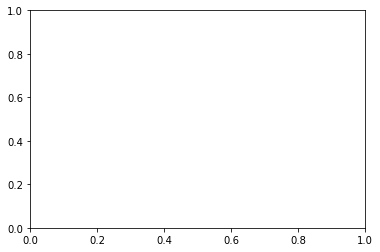

In [32]:
fig, ax = plt.subplots()
ax.bar(x=df['Engine Type'], height=df['Total Fatal Injuries'])